In [82]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [87]:
df_diabetes = pd.read_csv("diabetes.csv")

In [88]:
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [89]:
print(df_diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


<Axes: >

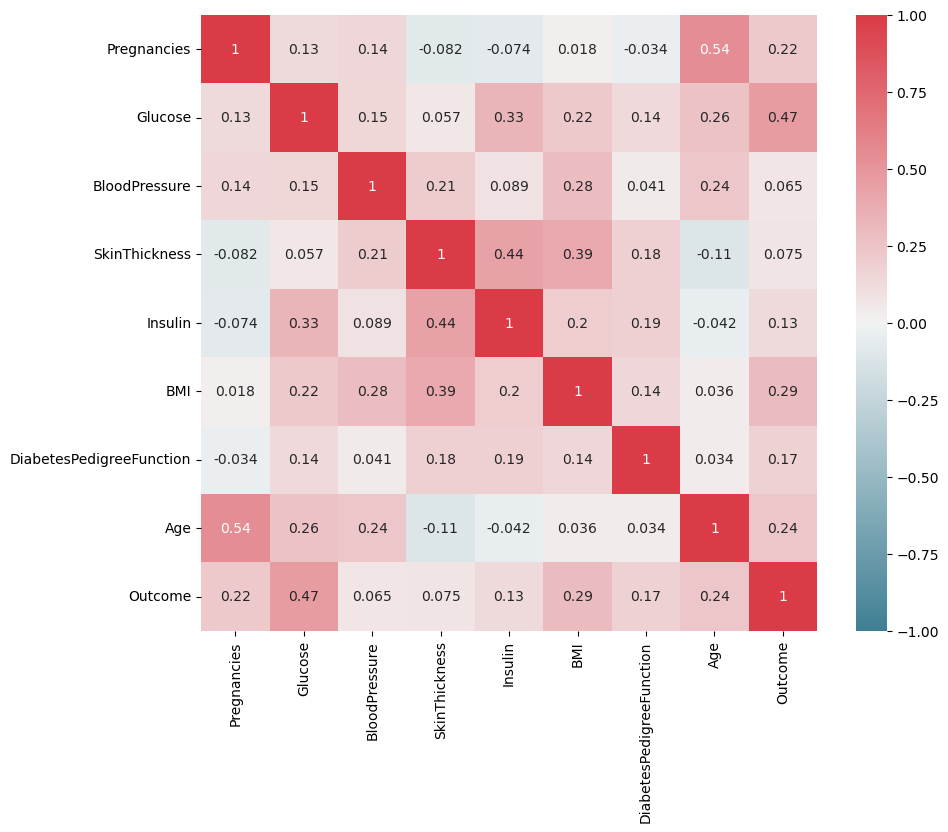

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(10, 8))

corr = df_diabetes.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    annot = True,
    square=True, ax=ax)


In [91]:
# data with 0 value instead of null values
df_diabetes.drop(columns=['Pregnancies', 'Outcome']).isin([0, 0.0]).sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [92]:
# storing outcomes in dataframe y, and storing pregnancies in a separate list temporarily
# instead of creating a copy of another dataframe
pregnancies = df_diabetes['Pregnancies']
y = df_diabetes['Outcome']
df_diabetes = df_diabetes.drop(columns=['Pregnancies', 'Outcome'])
# making the 0 missing values into Nan values for imputing
df_diabetes.replace(0, np.nan, inplace=True)
print(f"Number of missing values = {np.isnan(df_diabetes.to_numpy()).sum()}")
df_diabetes['Pregnancies'] = pregnancies
columns = df_diabetes.columns
df_diabetes.head(5)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = y
X = (df_diabetes).to_numpy()
# 80-20 Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test_imputed=scaling_x.transform(X_test)

In [96]:
# Imputing missing values using knn
# knn imputation transform for the dataset

from sklearn.impute import KNNImputer

# print total missing
print('Missing: %d' % sum(np.isnan(X).flatten()))
# define imputer
imputer = KNNImputer(n_neighbors=5) # taking 5 neighbours
# fit transform on the dataset for training and testing set
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# print total missing
X_trans = np.concatenate((X_train_imputed, X_test_imputed), axis=0)
print('Missing: %d' % sum(np.isnan(X_trans).flatten()))

Missing: 652
Missing: 0


In [97]:
df_diabetes_cleaned = pd.DataFrame(X_trans, columns = columns)
df_diabetes_cleaned.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.478034,-0.188555,0.315640,-0.421253,0.708354,-0.946901,0.810205,3.353608
1,-0.824024,-0.648467,0.695029,-0.508571,0.664997,0.396130,-0.695262,-1.121017
2,-0.189688,-0.188555,-0.063750,-0.615099,-0.693521,-0.793670,-1.029810,-0.822709
3,-0.523549,-0.648467,0.600182,-0.342666,-0.245499,2.799765,0.057471,-0.524401
4,0.044015,1.191181,0.789876,-0.047530,0.433760,-0.814702,-0.360714,-1.121017


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pprint import pprint
best_preds = []
model_names = []

SVM without hyperparameter tuning
Accuracy: 0.7878787878787878
F1 score: 0.6620689655172414
SVM with hyperparameter tuning
Accuracy: 0.7835497835497836
F1 score: 0.6527777777777778


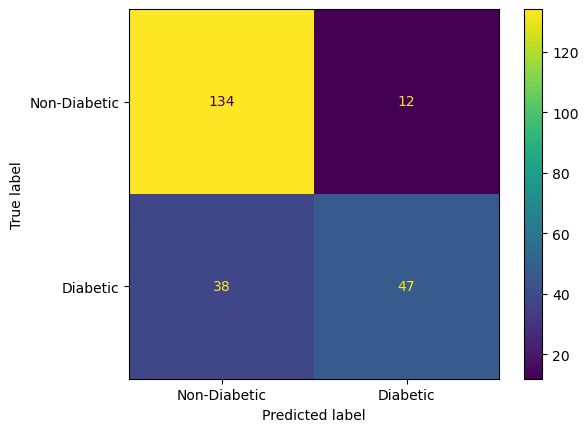

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model_names.append('Support Vector Machine')
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1, 1]}

# Create an SVM model
svm_model = SVC()

# print("Current params:")
# pprint(svm_model.get_params())

svm_model.fit(X_train_imputed, y_train)

# Instantiate GridSearchCV with cross-validation
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy')

# Fit the model to the data and perform hyperparameter tuning
grid_search_svm.fit(X_train_imputed, y_train)

# Print the best hyperparameters
# print("Best Hyperparameters:")
# pprint(grid_search_svm.best_params_)

# Get the best model
best_model_svm = grid_search_svm.best_estimator_

y_pred = svm_model.predict(X_test_imputed)
y_pred_best = best_model_svm.predict(X_test_imputed)
print("SVM without hyperparameter tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")

print("SVM with hyperparameter tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(f"F1 score: {f1_score(y_test, y_pred_best)}")    

best_preds.append([accuracy_score(y_test, y_pred_best), precision_score(y_test, y_pred_best), recall_score(y_test, y_pred_best), f1_score(y_test, y_pred_best)])

cm = confusion_matrix(y_test, y_pred_best, labels=best_model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot()
plt.show()

Fitting 3 folds for each of 100 candidates, totalling 300 fits
RF without hyperparameter tuning
Accuracy: 0.8095238095238095
F1 score: 0.7027027027027026
RF with hyperparameter tuning
Accuracy: 0.8095238095238095
F1 score: 0.7105263157894737


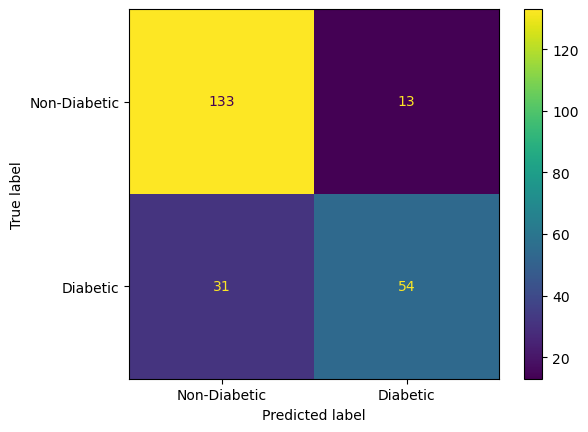

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model_names.append('Random Forest')

rf = RandomForestClassifier()
# print("Current params:")
# pprint(rf.get_params())

rf.fit(X_train_imputed, y_train)

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_imputed, y_train)

# Print the best hyperparameters
# print("Best Hyperparameters:")
# pprint(rf_random.best_params_)

# Get the best model
best_model_rf = rf_random.best_estimator_

y_pred = rf.predict(X_test_imputed)
y_pred_best = best_model_rf.predict(X_test_imputed)
print("RF without hyperparameter tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")

print("RF with hyperparameter tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(f"F1 score: {f1_score(y_test, y_pred_best)}")    

best_preds.append([accuracy_score(y_test, y_pred_best), precision_score(y_test, y_pred_best), recall_score(y_test, y_pred_best), f1_score(y_test, y_pred_best)])

cm = confusion_matrix(y_test, y_pred_best, labels=best_model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot()
plt.show()

DT without hyperparameter tuning
Accuracy: 0.7489177489177489
F1 score: 0.6741573033707865
DT with hyperparameter tuning
Accuracy: 0.696969696969697
F1 score: 0.513888888888889


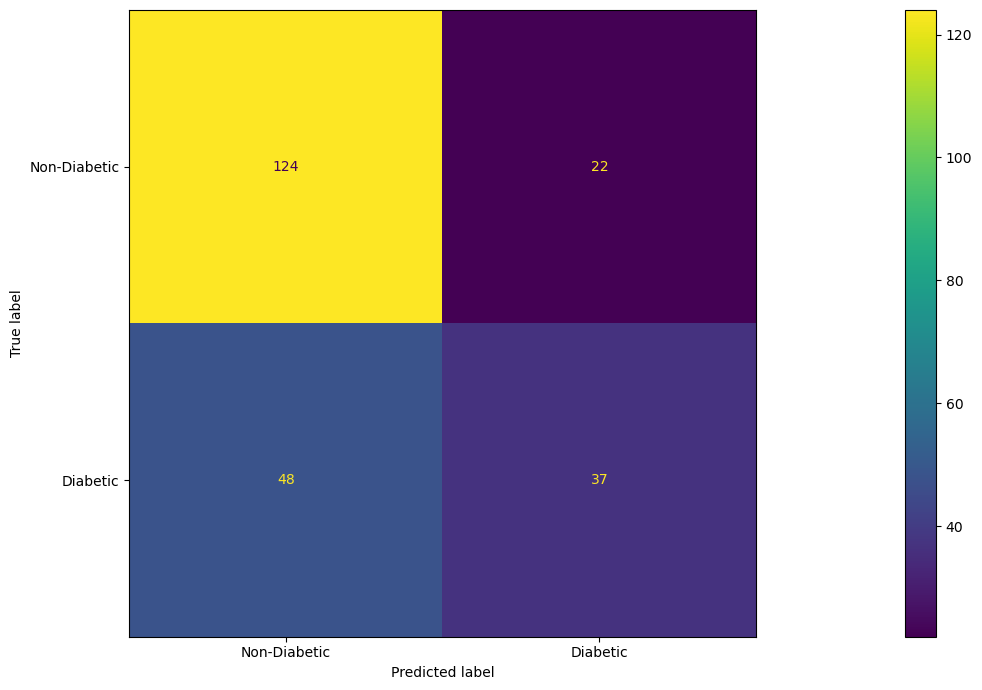

In [107]:
from sklearn.tree import DecisionTreeClassifier

model_names.append('Decision Tree')

dt = DecisionTreeClassifier()

print("Current params:")
pprint(dt.get_params())

dt.fit(X_train_imputed, y_train)

params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': range(1, 5),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
}

grid_search_dt = GridSearchCV(dt, params, cv=3, scoring='accuracy')

# Fit the model to the data and perform hyperparameter tuning
grid_search_dt.fit(X_train_imputed, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
pprint(grid_search_dt.best_params_)

# Get the best model
best_model_dt = grid_search_dt.best_estimator_

y_pred = dt.predict(X_test_imputed)
y_pred_best = best_model_dt.predict(X_test_imputed)


print("DT without hyperparameter tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")
print()
print("DT with hyperparameter tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(f"F1 score: {f1_score(y_test, y_pred_best)}")    
print()

best_preds.append([accuracy_score(y_test, y_pred_best), precision_score(y_test, y_pred_best), recall_score(y_test, y_pred_best), f1_score(y_test, y_pred_best)])

cm = confusion_matrix(y_test, y_pred_best, labels=best_model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])

disp.plot()
plt.show()

XGB without hyperparameter tuning
Accuracy: 0.7316017316017316
F1 score: 0.6219512195121951
XGB with hyperparameter tuning
Accuracy: 0.8138528138528138
F1 score: 0.7295597484276729


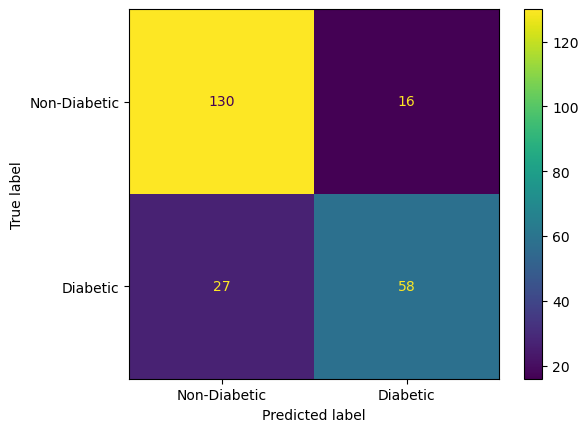

In [105]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV

model_names.append('XGBoost')

# Create an XGBoost classifier
xgb = XGBClassifier()

print("Current params:")
pprint(xgb.get_params())

xgb.fit(X_train_imputed, y_train)

# Define the parameter search space
param_space = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (50, 200),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1.0, 'uniform'),
    'gamma': (0.0, 1.0, 'uniform'),
    'colsample_bytree': (0.1, 1.0, 'uniform'),
}

# Instantiate BayesSearchCV
bayes_search_xgb = BayesSearchCV(
    xgb,
    param_space,
    cv=3,  # Number of cross-validation folds
)

np.int = np.int_
# Fit the model to the training data and perform hyperparameter tuning
bayes_search_xgb.fit(X_train_imputed, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
pprint(bayes_search_xgb.best_params_)

# Get the best model
best_model_xgb = bayes_search_xgb.best_estimator_


y_pred = xgb.predict(X_test_imputed)
y_pred_best = best_model_xgb.predict(X_test_imputed)
print("XGB without hyperparameter tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")
print()
print("XGB with hyperparameter tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(f"F1 score: {f1_score(y_test, y_pred_best)}")    
print()

best_preds.append([accuracy_score(y_test, y_pred_best), precision_score(y_test, y_pred_best), recall_score(y_test, y_pred_best), f1_score(y_test, y_pred_best)])

cm = confusion_matrix(y_test, y_pred_best, labels=best_model_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot()
plt.show()

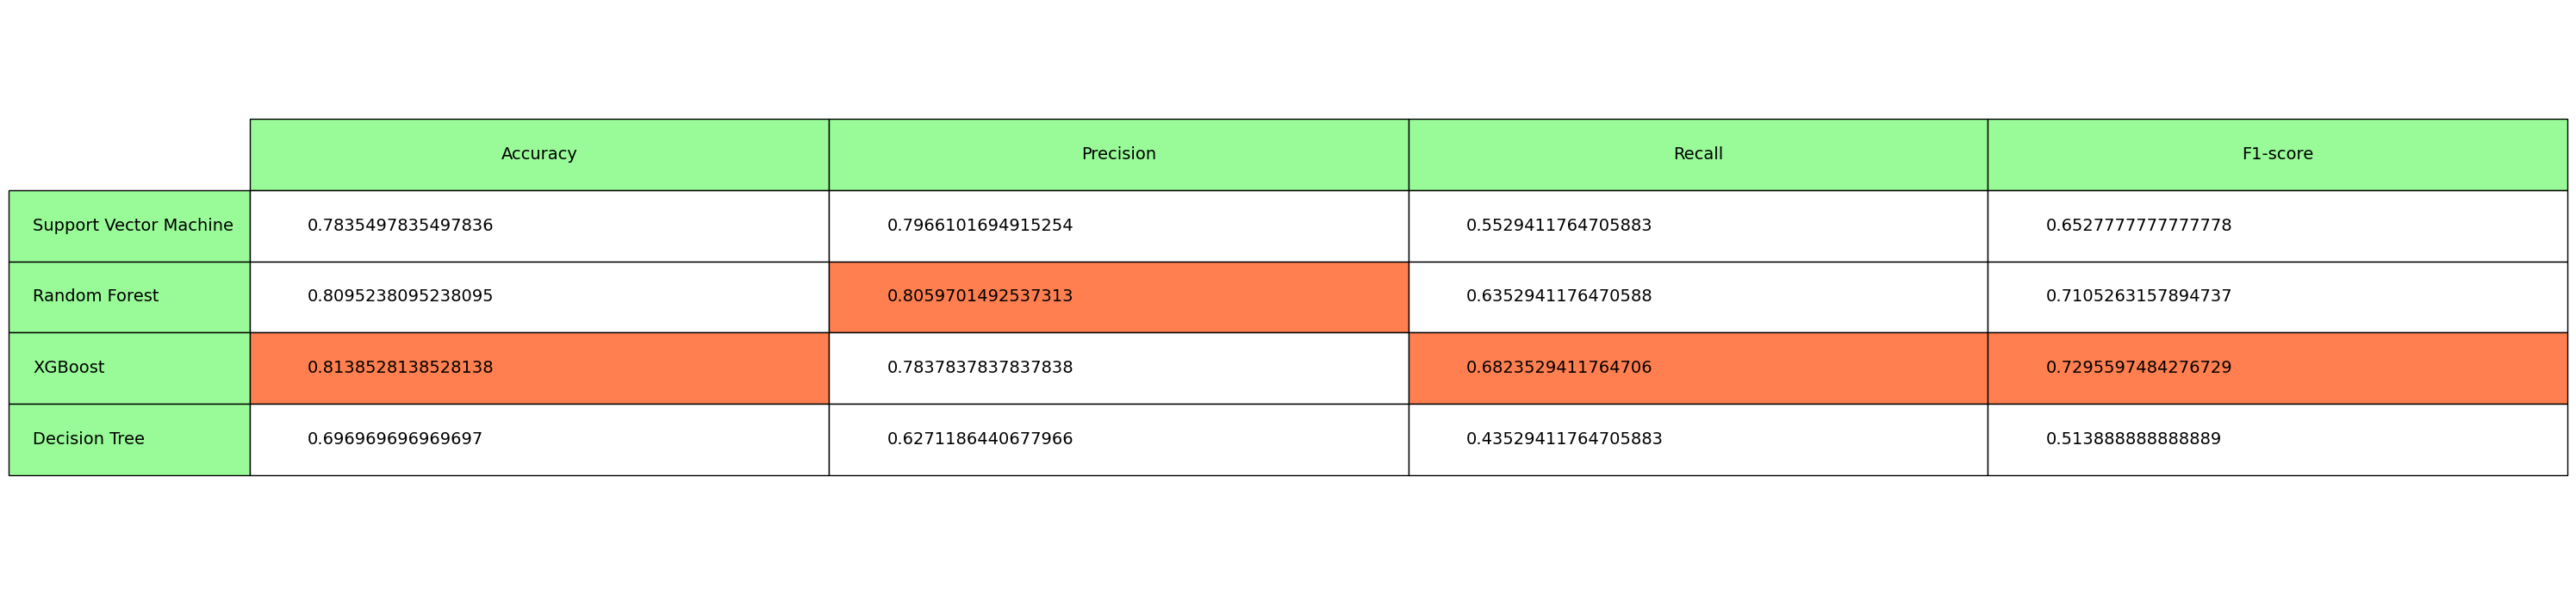

In [111]:
# tabulate their classification report
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
plt.rcParams["figure.figsize"] = [30, 7]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
axs.axis('tight')
axs.axis('off')

table1 = axs.table(cellText=best_preds,
                      cellLoc = 'left',
                      rowLabels = model_names,
                      rowColours= ["palegreen"] * 10,
                      colLabels=evaluation_metrics,
                      colColours= ["palegreen"] * 10,
                      loc='center')

# Highlight cells with minimum value in each column
for col_idx, metric in enumerate(evaluation_metrics):
    col_values = [row[col_idx] for row in best_preds]
    max_value_idx = col_values.index(max(col_values))

    # Highlight the cell with maximum value in coral color
    table1[max_value_idx + 1, col_idx].set_facecolor("coral")
        
table1.auto_set_font_size(False)
table1.set_fontsize(14)
table1.scale(1, 4)
fig.tight_layout()
plt.show()


In [38]:
%pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
import graphviz

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(grid_search_dt.best_estimator_, out_file='tree.dot', 
                feature_names = df_diabetes_cleaned.columns,
                class_names = ['Non-Diabetic', 'Diabetic'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')



In [56]:
!dot -Tpng {"tree.dot"} -o {"tree.png"}

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [47]:
from graphviz import Source

Source.from_file("tree.dot")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [26]:
%pip install scikit-optimize

     ---------------------------------------- 0.0/100.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/100.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/100.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/100.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/100.3 kB ? eta -:--:--
     ----------- ------------------------- 30.7/100.3 kB 131.3 kB/s eta 0:00:01
     --------------- --------------------- 41.0/100.3 kB 151.3 kB/s eta 0:00:01
     -------------------------- ---------- 71.7/100.3 kB 231.8 kB/s eta 0:00:01
     ------------------------------------ 100.3/100.3 kB 304.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV

# Create an XGBoost classifier
xgb = XGBClassifier()

print("Current params:", xgb.get_params)

# Define the parameter search space
param_space = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (50, 200),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1.0, 'uniform'),
    'gamma': (0.0, 1.0, 'uniform'),
    'colsample_bytree': (0.1, 1.0, 'uniform'),
}

# Instantiate BayesSearchCV
bayes_search_xgb = BayesSearchCV(
    xgb,
    param_space,
    cv=3,  # Number of cross-validation folds
)

np.int = np.int_
# Fit the model to the training data and perform hyperparameter tuning
bayes_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", bayes_search_xgb.best_params_)

# Get the best model
best_model_xgb = bayes_search_xgb.best_estimator_


y_pred = xgb.fit(X_test_imputed)
y_pred_best = best_model_xgb.fit(X_test_imputed)
print("XGB without hyperparameter tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")

print("XGB with hyperparameter tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(f"F1 score: {f1_score(y_test, y_pred_best)}")    

best_preds.append([accuracy_score(y_test, y_pred_best), precision_score(y_test, y_pred_best), recall_score(y_test, y_pred_best), f1_score(y_test, y_pred_best)])

cm = confusion_matrix(y_test, y_pred_best, labels=best_model_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])


In [30]:
%pip install numpy --upgrade

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     --------------------------------- ------ 51.2/61.2 kB 2.7 MB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 822.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
    --------------------------------------- 0.2/15.8 MB 4.9 MB/s eta 0:00:04
   - -------------------------------------- 0.5/15.8 MB 5.7 MB/s eta 0:00:03
   -- ------------------------------------- 1.2/15.8 MB 9.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/15.8 MB 8.7 MB/s eta 0:00:02
   ----- ---------------------------------- 2.3/15.8 MB 10.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/15.8 MB 10.9 MB/s eta 0:00:02
   --------- ------------------------------ 3.6/15.8 MB 11.5 MB/s eta 0:00:02
   --------- ------------------------------ 3.6/15.8 MB 11.5 MB/s eta 0:00:02
   ------------ --------------------------- 5.0/15.8 MB 12.2 MB/s eta 0:00:01


  You can safely remove it manually.


In [34]:


# Evaluate the performance on the test set
accuracy_test = best_model.score(X_test_imputed, y_test)
print("Test Accuracy with Best Model:", accuracy_test)

Best Hyperparameters: OrderedDict([('colsample_bytree', 0.5409711145688327), ('gamma', 0.9405602407275063), ('learning_rate', 0.13424666072348485), ('max_depth', 7), ('min_child_weight', 6), ('n_estimators', 174), ('subsample', 0.5828594193918621)])
Test Accuracy with Best Model: 1.0


In [ ]:
# compare f1 and accuracy for the hyperparameter tuning
# then compare classification reports for the different algorithms (best version)